In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-prediction-dataset/Breast_cancer_data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [3]:
# loading the data from sklearn
data_frame = pd.read_csv("/kaggle/input/breast-cancer-prediction-dataset/Breast_cancer_data.csv")

In [4]:
print(data_frame)

     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     diagnosis  
0            0  
1            0  
2           

In [5]:
# print the first 5 rows of the dataframe
data_frame.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [6]:
# getting some information about the data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [7]:
# checking for missing values
data_frame.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [8]:
# statistical measures about the data
data_frame.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [9]:
# checking the distribution of Target Varibale
data_frame['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [10]:
data_frame.groupby('diagnosis').mean()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
diagnosis,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898
1,12.146524,17.914762,78.075406,462.790196,0.092478


In [11]:
X = data_frame.drop(columns='diagnosis', axis=1)
Y = data_frame['diagnosis']

In [12]:
print(X)

     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
0          17.99         10.38          122.80     1001.0          0.11840
1          20.57         17.77          132.90     1326.0          0.08474
2          19.69         21.25          130.00     1203.0          0.10960
3          11.42         20.38           77.58      386.1          0.14250
4          20.29         14.34          135.10     1297.0          0.10030
..           ...           ...             ...        ...              ...
564        21.56         22.39          142.00     1479.0          0.11100
565        20.13         28.25          131.20     1261.0          0.09780
566        16.60         28.08          108.30      858.1          0.08455
567        20.60         29.33          140.10     1265.0          0.11780
568         7.76         24.54           47.92      181.0          0.05263

[569 rows x 5 columns]


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(569, 5) (455, 5) (114, 5)


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

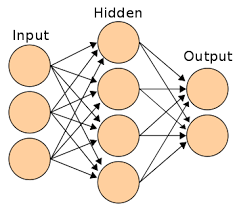

In [17]:
# importing tensorflow and Keras
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras

In [18]:
# setting up the layers of Neural Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(5,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

2022-11-19 05:28:30.777500: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [19]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# training the Meural Network

history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

2022-11-19 05:28:31.078139: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
13/13 [==============================] - 1s 22ms/step - loss: 0.6524 - accuracy: 0.5110 - val_loss: 0.5960 - val_accuracy: 0.7826
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 0.5685 - accuracy: 0.7824 - val_loss: 0.5279 - val_accuracy: 0.9130
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.4966 - accuracy: 0.9144 - val_loss: 0.4687 - val_accuracy: 0.9130
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.4381 - accuracy: 0.9291 - val_loss: 0.4169 - val_accuracy: 0.9130
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.3893 - accuracy: 0.9340 - val_loss: 0.3739 - val_accuracy: 0.9130
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.3493 - accuracy: 0.9340 - val_loss: 0.3367 - val_accuracy: 0.9130
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.3165 - accuracy: 0.9364 - val_loss: 0.3064 - val_accuracy: 0.9130
Epoch 8/10
13/13 [=

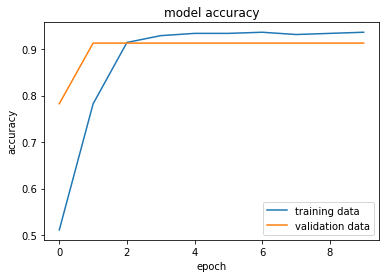

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

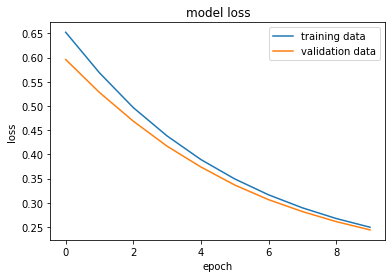

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [24]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)

4/4 [==============================] - 0s 3ms/step - loss: 0.2362 - accuracy: 0.9211
0.9210526347160339


In [25]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 5)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457 ]


In [26]:
Y_pred = model.predict(X_test_std)

In [27]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.35873517 0.5029589 ]


In [28]:
print(X_test_std)

[[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457 ]
 [ 0.24583601 -0.06219797  0.21802678  0.10121824 -0.42922355]
 [-1.26115925 -0.29051645 -1.26499659 -1.03398179 -0.90745995]
 [ 2.32749424  0.06794357  2.51739329  2.42738749  2.56800545]
 [ 0.09206098 -0.64669328  0.09928596 -0.0292873   0.10378882]
 [ 1.55292373  2.14564174  1.72578782  1.57244881 -0.24101892]
 [-0.66827109  0.18438599 -0.64490564 -0.6560536   0.90365851]
 [-0.25535667 -0.81108259 -0.31630692 -0.32342017 -0.76700874]
 [-0.52588681 -0.32704741 -0.55543773 -0.54140123 -0.66658611]
 [ 0.20312072 -1.06679928  0.12031298  0.08253415 -0.79439672]
 [-0.1898599   0.05881083 -0.24333079 -0.24387124 -0.38989721]
 [-0.7850262   0.43096995 -0.79415626 -0.7220141  -0.59284922]
 [-0.62840349 -0.45947213 -0.6407827  -0.61132502  1.8587268 ]
 [-0.53158218  0.04282853 -0.54430578 -0.53941958 -0.01208344]
 [-0.73376786 -0.14210944 -0.75869893 -0.68662757 -0.05562331]
 [ 1.45040705 -0.78368437  1.42481282  1.43090267 -0.63

In [29]:
print(Y_pred)

[[0.35873517 0.5029589 ]
 [0.4865495  0.5156639 ]
 [0.13399896 0.77974653]
 [0.86323977 0.01299003]
 [0.41139638 0.5629847 ]
 [0.7840421  0.05543575]
 [0.2307291  0.57070976]
 [0.28091386 0.6579867 ]
 [0.24696037 0.6912068 ]
 [0.37594283 0.616423  ]
 [0.3549177  0.6269557 ]
 [0.23887283 0.7244575 ]
 [0.22032762 0.50656635]
 [0.2656489  0.6552681 ]
 [0.21436489 0.6811955 ]
 [0.70755506 0.29688114]
 [0.21112615 0.74410343]
 [0.18187591 0.64480716]
 [0.17596984 0.7396643 ]
 [0.6454229  0.10767207]
 [0.12059355 0.6719364 ]
 [0.20873678 0.70879483]
 [0.3247128  0.7232104 ]
 [0.2325584  0.6261682 ]
 [0.39751312 0.5576389 ]
 [0.75554585 0.09373751]
 [0.40022618 0.52948385]
 [0.48406368 0.51333034]
 [0.77125394 0.20523295]
 [0.7768807  0.10966209]
 [0.37080175 0.64973295]
 [0.21436974 0.644308  ]
 [0.23018411 0.65208924]
 [0.82825863 0.02808002]
 [0.75876594 0.06221172]
 [0.28815746 0.6759005 ]
 [0.4113211  0.7898232 ]
 [0.4175613  0.657018  ]
 [0.16274706 0.6660681 ]
 [0.1517959  0.7112771 ]


In [30]:
#  argmax function

my_list = [0.25, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.25, 0.56]
1


In [31]:
# converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


**Building the predictive system**

In [32]:
input_data = (11.76,21.6,74.72,427.9,0.08637)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

[[0.26441464 0.7172659 ]]
[1]
The tumor is Benign


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
